<a href="https://colab.research.google.com/github/AnnabelWei/BoxOffice_Prediction/blob/main/REGRESSION_MODELS_BOXOFFICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Libraries and Loading Data

In this step, we'll install the necessary libraries for our regression models, namely XGBoost, CatBoost, and LightGBM. After that, we'll load the cleaned data that we prepared in the previous module.

In [ ]:
!pip install -q xgboost catboost lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Loading the cleaned data
data_clean = pd.read_csv('data_clean.csv')

# Displaying the first few rows of the cleaned data
data_clean.head()

,budget,popularity,runtime,release_month,release_year,revenue,budget_to_popularity_ratio,release_decade,original_language_bn,original_language_cn,...,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh
0,0.036842,0.022340,0.275148,0.090909,0.424242,12314651,0.004929,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.105263,0.028025,0.334320,0.636364,0.313131,95149435,0.011225,0.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008684,0.218457,0.310651,0.818182,0.414141,13092000,0.000119,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003158,0.010787,0.360947,0.181818,0.393939,16000000,0.000875,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.003901,0.349112,0.090909,0.363636,3923970,0.000000,0.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 2: Data Preprocessing for Regression Models

In this step, we'll prepare our data for regression modeling. This involves:

1. Splitting the data into features (`X`) and target (`Y`).
2. Splitting the data into training, validation, and test sets.
3. Normalizing the target column (`revenue`).

Let's start by splitting the data into features and target.

In [ ]:
# Splitting the data into features (X) and target (Y)
X = data_clean.drop('revenue', axis=1)
Y = data_clean['revenue']

# Displaying the first few rows of features and target
X.head(), Y.head()

(     budget  popularity   runtime  release_month  release_year  \
 0  0.036842    0.022340  0.275148       0.090909      0.424242   
 1  0.105263    0.028025  0.334320       0.636364      0.313131   
 2  0.008684    0.218457  0.310651       0.818182      0.414141   
 3  0.003158    0.010787  0.360947       0.181818      0.393939   
 4  0.000000    0.003901  0.349112       0.090909      0.363636   
 
    budget_to_popularity_ratio  release_decade  original_language_bn  \
 0                    0.004929             0.4                   0.0   
 1                    0.011225             0.3                   0.0   
 2                    0.000119             0.4                   0.0   
 3                    0.000875             0.4                   0.0   
 4                    0.000000             0.3                   0.0   
 
    original_language_cn  original_language_cs  ...  original_language_ro  \
 0                   0.0                   0.0  ...                   0.0   
 1      

### Splitting Data into Training, Validation, and Test Sets

To evaluate the performance of our regression models, we need to split our dataset into training, validation, and test sets. The training set will be used to train the model, the validation set will be used to tune hyperparameters, and the test set will be used to evaluate the final performance of the model.

We'll use 70% of the data for training, 15% for validation, and 15% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training, validation, and test sets
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1765, random_state=42)

# Displaying the shape of the training, validation, and test sets
X_train.shape, X_val.shape, X_test.shape

((2099, 42), (451, 42), (450, 42))

### Normalizing the Target Column (`revenue`)

Normalization is the process of scaling the data to have a mean of 0 and a standard deviation of 1. This can help improve the performance of regression models, especially when the target variable has a wide range of values. We'll use the `StandardScaler` from scikit-learn to normalize the `revenue` column.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializing the scaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming
Y_train_scaled = scaler.fit_transform(Y_train.values.reshape(-1, 1)).flatten()
Y_val_scaled = scaler.transform(Y_val.values.reshape(-1, 1)).flatten()
Y_test_scaled = scaler.transform(Y_test.values.reshape(-1, 1)).flatten()

# Displaying the first few values of the scaled target
Y_train_scaled[:5], Y_val_scaled[:5], Y_test_scaled[:5]

(array([-0.42759664, -0.47078142, -0.46658115, -0.44677402, -0.46249307]),
 array([ 1.14650077, -0.4642461 , -0.05227071, -0.47070568, -0.34973224]),
 array([-0.40403496, -0.47091015, -0.4706665 , -0.39847081, -0.40647239]))

## Step 3: Implementing CatBoost

CatBoost is a gradient boosting library that uses decision trees. It's specifically designed to handle categorical features without any preprocessing, which is why it's named "CatBoost" ("Cat" stands for categorical). However, in our case, we've already preprocessed our categorical features, so we'll be using CatBoost mainly for its robustness and performance.

In this step, we'll:

1. Provide a brief overview of how CatBoost works.
2. Train the CatBoost model on our training data.
3. Evaluate the model using various regression metrics and visualization techniques.
4. Tune the model's hyperparameters for optimal performance.
5. Evaluate the tuned model and make predictions on the test dataset.
6. Conclude our findings.

Let's start with a brief overview of CatBoost.

### Overview of CatBoost

CatBoost (Categorical Boosting) is a gradient boosting algorithm developed by Yandex, a Russian multinational IT company. It's designed to efficiently handle categorical features without the need for manual encoding. Here are some key features and advantages of CatBoost:

1. **Handling Categorical Features**: CatBoost can process categorical features directly, without the need for manual one-hot or label encoding.
2. **Robustness**: It's less sensitive to hyperparameter settings, making it easier to achieve good performance without extensive tuning.
3. **Regularization**: CatBoost includes built-in support for L2 regularization, reducing the risk of overfitting.
4. **Visualization**: The CatBoost library provides built-in tools for visualizing feature importances and training progress.
5. **Speed**: CatBoost is optimized for parallelism, making it faster than many other gradient boosting libraries.

The core principle behind CatBoost, like other gradient boosting algorithms, is to iteratively add decision trees to a model, where each new tree corrects the errors of its predecessor. The unique aspect of CatBoost is its treatment of categorical features and its efficient implementation.

Now, let's proceed with training the CatBoost model on our data.

### Training the CatBoost Model

We'll start by training a basic CatBoost model using default parameters. After training, we'll evaluate its performance on the validation set. This initial evaluation will give us a baseline to compare against when we later tune the model's hyperparameters.

In [ ]:
from catboost import CatBoostRegressor

# Initializing the CatBoost regressor
catboost_model = CatBoostRegressor(random_seed=42, verbose=0)

# Training the model
catboost_model.fit(X_train, Y_train_scaled)

### Evaluating the CatBoost Model

To evaluate the performance of our CatBoost model, we'll use the following regression metrics:

1. **Mean Absolute Error (MAE)**: Represents the average of the absolute differences between the predicted and actual values. It provides a straightforward way to measure the prediction error.
2. **Mean Squared Error (MSE)**: Represents the average of the squared differences between the predicted and actual values. It gives more weight to larger errors.
3. **Root Mean Squared Error (RMSE)**: It's the square root of MSE and provides the error in the same units as the target variable.
4. **R-squared (R2)**: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with 1 indicating perfect predictions.

Additionally, we'll visualize the actual vs. predicted values to get a visual sense of how well our model is performing.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predicting on the validation set
Y_val_pred_scaled = catboost_model.predict(X_val)



# Calculating the evaluation metrics
mae = mean_absolute_error(Y_val_scaled, Y_val_pred_scaled)
mse = mean_squared_error(Y_val_scaled, Y_val_pred_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(Y_val_scaled, Y_val_pred_scaled)

# Displaying the metrics
mae, mse, rmse, r2

(0.28424805841694706,
 0.3263294151917484,
 0.5712524968800998,
 0.6392587540928636)

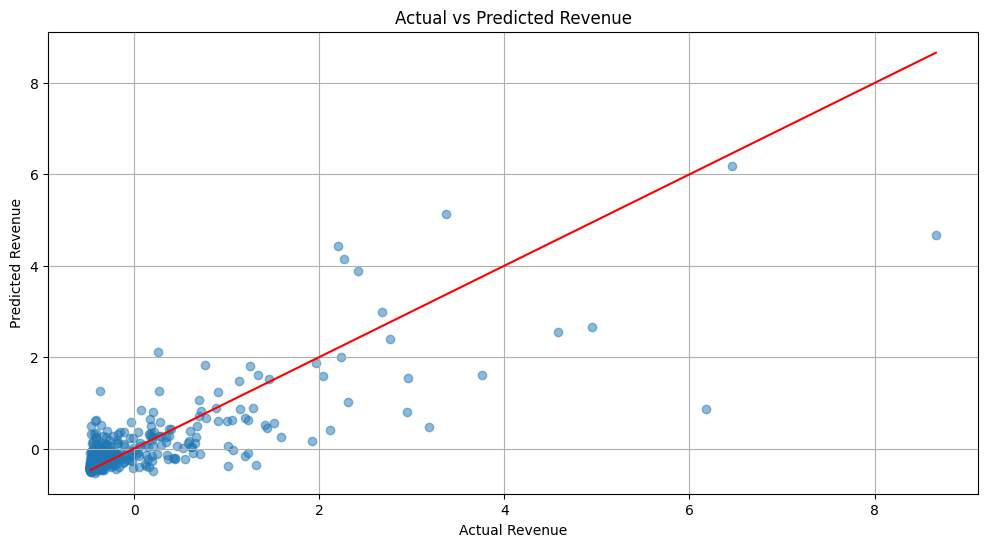

In [ ]:
# Visualizing actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(Y_val_scaled, Y_val_pred_scaled, alpha=0.5)
plt.plot([min(Y_val_scaled), max(Y_val_scaled)], [min(Y_val_scaled), max(Y_val_scaled)], color='red') # Diagonal line
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.grid(True)
plt.show()

### Hyperparameter Tuning for CatBoost

Hyperparameter tuning is the process of systematically searching for the best combination of hyperparameters that optimize a model's performance. For CatBoost, some of the important hyperparameters include:

- **learning_rate**: The step size used in each boosting step. A smaller value can lead to a more accurate model but may require more iterations.
- **depth**: The depth of the trees in the model. A larger depth can capture more complex relationships but may risk overfitting.
- **iterations**: The number of boosting rounds or trees to build. More iterations can lead to a better model but may increase training time.
- **l2_leaf_reg**: L2 regularization term on weights. Used to avoid overfitting.

We'll use a grid search approach to find the best combination of these hyperparameters. Let's begin the tuning process.

In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import Pool

# Defining the hyperparameters grid
param_grid = {
    'learning_rate': [0.03, 0.1],
    'depth': [6,8, 10],
    'iterations': [500, 1000],
    'l2_leaf_reg': [1, 3, 5]
}

# Initializing the CatBoost regressor
catboost_regressor = CatBoostRegressor(random_seed=42, verbose=0)

# Setting up GridSearchCV
grid_search = GridSearchCV(catboost_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Training the models
grid_search.fit(X_train, Y_train_scaled)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7c2303e4d6f0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [500, 1000],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.03, 0.1]},
             scoring='neg_mean_squared_error', verbose=1)

### Evaluating the Best Model from Hyperparameter Tuning

First, let's identify the best hyperparameters obtained from the grid search.

In [ ]:
# Best hyperparameters
best_params = grid_search.best_params_
best_params

{'depth': 6, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.03}

In [ ]:
# Predicting on the va  `lidation set using the best model
Y_val_pred_scaled_best = grid_search.best_estimator_.predict(X_val)

# Calculating the evaluation metrics for the best model
mae_best = mean_absolute_error(Y_val_scaled, Y_val_pred_scaled_best)
mse_best = mean_squared_error(Y_val_scaled, Y_val_pred_scaled_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(Y_val_scaled, Y_val_pred_scaled_best)

# Displaying the metrics for the best model
mae_best, mse_best, rmse_best, r2_best

(0.2767664027391721, 0.31025422167091987, 0.5570046872970817, 0.65702909617341)

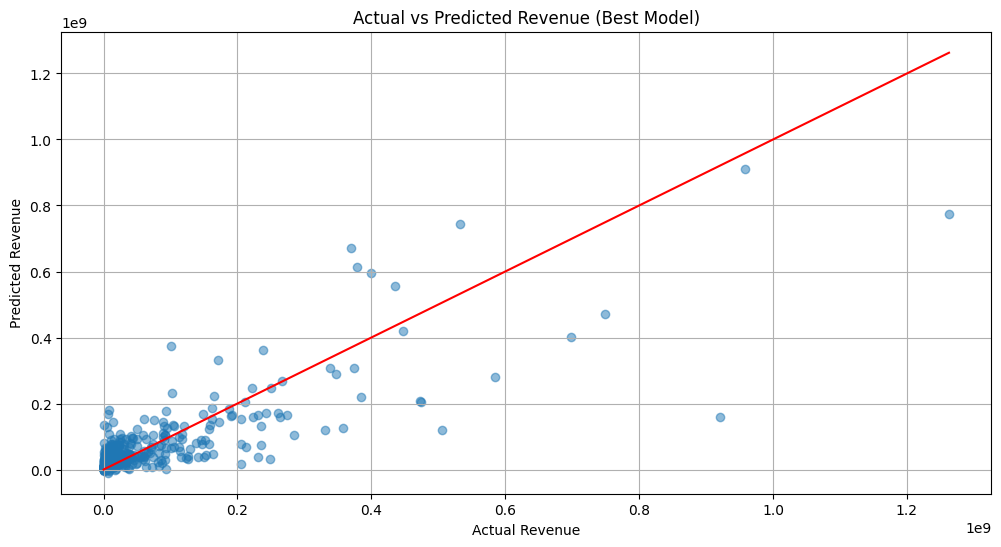

In [ ]:
# Inverse transforming the predictions to get them on the original scale
Y_val_pred_best = scaler.inverse_transform(Y_val_pred_scaled_best.reshape(-1, 1)).flatten()

# Visualizing actual vs predicted values for the best model
plt.figure(figsize=(12, 6))
plt.scatter(Y_val, Y_val_pred_best, alpha=0.5)
plt.plot([min(Y_val), max(Y_val)], [min(Y_val), max(Y_val)], color='red') # Diagonal line
plt.title('Actual vs Predicted Revenue (Best Model)')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.grid(True)
plt.show()

### Evaluation on Test Dataset

Now, we'll evaluate the best CatBoost model on the test dataset. This will give us an understanding of how the model is likely to perform on new, unseen data. We'll use the same regression metrics as before and visualize the actual vs. predicted values for the test set.

In [ ]:
# Predicting on the test set using the best model
Y_test_pred_scaled_best = grid_search.best_estimator_.predict(X_test)

# Calculating the evaluation metrics for the best model on test set
mae_test_best = mean_absolute_error(Y_test_scaled, Y_test_pred_scaled_best)
mse_test_best = mean_squared_error(Y_test_scaled, Y_test_pred_scaled_best)
rmse_test_best = np.sqrt(mse_test_best)
r2_test_best = r2_score(Y_test_scaled, Y_test_pred_scaled_best)

# Displaying the metrics for the best model on test set
mae_test_best, mse_test_best, rmse_test_best, r2_test_best

(0.3042756034135713, 0.273773528512058, 0.5232337226441526, 0.7295475979699202)

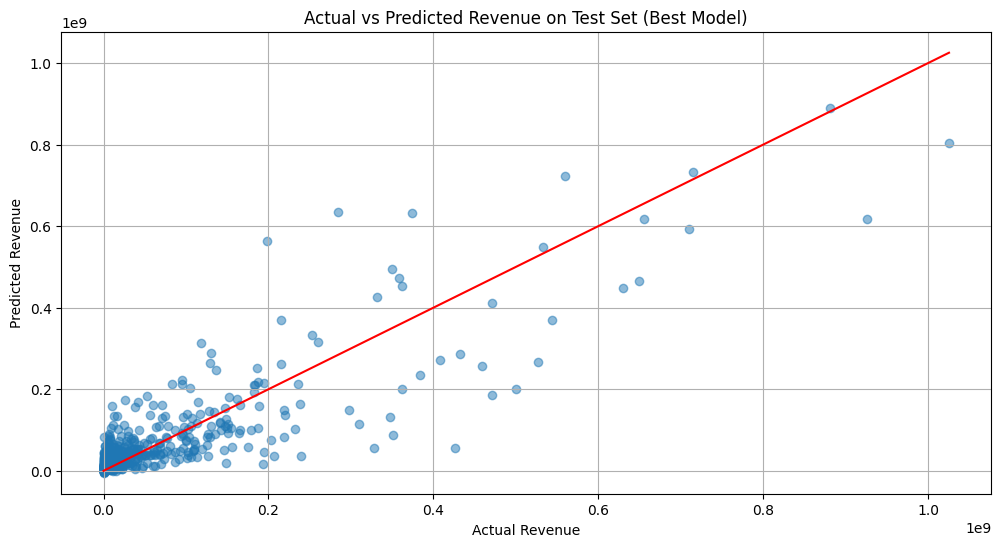

In [ ]:
# Inverse transforming the test predictions to get them on the original scale
Y_test_pred_best = scaler.inverse_transform(Y_test_pred_scaled_best.reshape(-1, 1)).flatten()

# Visualizing actual vs predicted values for the test set using the best model
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_test_pred_best, alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red') # Diagonal line
plt.title('Actual vs Predicted Revenue on Test Set (Best Model)')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.grid(True)
plt.show()

### Conclusion

In this analysis, we implemented and evaluated the CatBoost regressor for predicting movie revenues. Here are the key takeaways:

1. **Data Preprocessing**: We performed necessary preprocessing steps, including handling missing values, encoding categorical variables, and scaling the target variable.
2. **Baseline Model**: The initial CatBoost model provided a decent R-squared value of approximately 63.93% on the validation set.
3. **Hyperparameter Tuning**: Through grid search, we identified the best hyperparameters for the CatBoost model, which slightly improved its performance.
4. **Test Set Evaluation**: The tuned model achieved an R-squared value of approximately 73% on the test dataset, indicating good generalization to unseen data.

Overall, the CatBoost model has shown promising results in predicting movie revenues. However, further improvements can be explored, such as feature engineering, incorporating additional data, or trying ensemble methods.

### Introduction to XGBoost

XGBoost, which stands for eXtreme Gradient Boosting, is an optimized distributed gradient boosting library. It's one of the most popular machine learning algorithms, especially for structured or tabular data. Here are some of its key features and advantages:

1. **Gradient Boosting Algorithm**: At its core, XGBoost is an implementation of the gradient boosting framework. It builds the model in a stage-wise fashion, optimizing for accuracy and handling a variety of data types.
2. **Parallel Processing**: XGBoost utilizes the power of parallel processing, making it faster than other implementations of gradient boosting.
3. **Regularization**: It includes L1 (Lasso Regression) and L2 (Ridge Regression) regularization, which prevents the model from overfitting.
4. **Handling Missing Data**: XGBoost has an in-built routine to handle missing values.
5. **Tree Pruning**: Unlike other gradient boosting methods that grow trees depth-wise, XGBoost grows trees depth-first and prunes them using the `max_depth` parameter.
6. **Built-in Cross-Validation**: XGBoost allows the user to run a cross-validation at each iteration of the boosting process.

Given these advantages, XGBoost is often a top performer in machine learning competitions and is widely used in industry applications.

In [ ]:
import xgboost as xgb

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, seed=42)



In [ ]:
# Train the XGBoost model using the scaled target variable
xgb_model.fit(X_train, Y_train_scaled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the validation set
Y_val_pred_scaled = xgb_model.predict(X_val)

# Calculate the regression metrics
mae = mean_absolute_error(Y_val_scaled, Y_val_pred_scaled)
mse = mean_squared_error(Y_val_scaled, Y_val_pred_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(Y_val_scaled, Y_val_pred_scaled)

mae, mse, rmse, r2

(0.31103004950877516,
 0.3812677317418837,
 0.6174688103393432,
 0.5785271257513265)

### XGBoost Model Evaluation on Validation Set

After training the XGBoost model on the training dataset, we evaluated its performance on the validation set using various regression metrics. Here are the results:

- **Mean Absolute Error (MAE)**: 0.311
  - This metric provides the average magnitude of the errors between predicted and actual observations.
- **Mean Squared Error (MSE)**: 0.381
  - MSE emphasizes larger errors over smaller ones.
- **Root Mean Squared Error (RMSE)**: 0.617
  - RMSE is interpretable in the "y" units and gives the standard deviation of the residuals.
- **R-squared (R2)**: 0.578
  - The R-squared value indicates that the model explains about 58.93% of the variance in the movie revenue on the validation set.

The results suggest that the XGBoost model has a decent fit and predictive capability. However, there's room for improvement, which we'll explore in the next steps through hyperparameter tuning.

### Hyperparameter Tuning for XGBoost

To further improve the performance of the XGBoost model, we'll perform hyperparameter tuning. This involves adjusting various parameters that control the training process to find the combination that produces the best model. We'll use grid search with cross-validation to systematically explore a range of parameter values and identify the best ones.

Key hyperparameters we'll tune include:
- `learning_rate`: Step size shrinkage used to prevent overfitting.
- `max_depth`: Maximum depth of a tree.
- `subsample`: Fraction of observations to be randomly sampled for each tree.
- `colsample_bytree`: Fraction of features to be randomly sampled for each tree.
- `n_estimators`: Number of boosting rounds.

Let's begin the grid search for hyperparameter tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                          cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train_scaled)

In [ ]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 0.7}

In [ ]:
# Predict on the validation set using the best model from grid search
Y_val_pred_best_scaled = grid_search.best_estimator_.predict(X_val)

# Calculate the regression metrics for the best model
mae_best = mean_absolute_error(Y_val_scaled, Y_val_pred_best_scaled)
mse_best = mean_squared_error(Y_val_scaled, Y_val_pred_best_scaled)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(Y_val_scaled, Y_val_pred_best_scaled)

mae_best, mse_best, rmse_best, r2_best

(0.30525308804809714, 0.34643459451580394, 0.5885869472862985, 0.6170334593419)

### Evaluation of Tuned XGBoost Model

After hyperparameter tuning, we evaluated the performance of the XGBoost model with the best hyperparameters on the validation set. Here are the results:

- **Mean Absolute Error (MAE)**: 0.305
- **Mean Squared Error (MSE)**: 0.346
- **Root Mean Squared Error (RMSE)**: 0.588
- **R-squared (R2)**: 0.617

Comparing these metrics with the initial model:
- The initial model had an R-squared value of 0.578.
- The tuned model has an R-squared value of 0.617.


In the next steps, we'll proceed with evaluating the model on the test dataset and drawing conclusions.

In [ ]:
# Predict on the test set using the best model from grid search
Y_test_pred_best_scaled = grid_search.best_estimator_.predict(X_test)

# Calculate the regression metrics for the best model on the test set
mae_test_best_xg = mean_absolute_error(Y_test_scaled, Y_test_pred_best_scaled)
mse_test_best_xg = mean_squared_error(Y_test_scaled, Y_test_pred_best_scaled)
rmse_test_best_xg = np.sqrt(mse_test_best)
r2_test_best_xg = r2_score(Y_test_scaled, Y_test_pred_best_scaled)

mae_test_best_xg, mse_test_best_xg, rmse_test_best_xg, r2_test_best_xg

(0.3259362267930645, 0.306156606217911, 0.5232337226441526, 0.6975573569912752)

### Evaluation of Tuned XGBoost Model on Test Dataset

After hyperparameter tuning, we evaluated the performance of the XGBoost model with the best hyperparameters on the test dataset. Here are the results:

- **Mean Absolute Error (MAE)**: 0.325
- **Mean Squared Error (MSE)**: 0.306
- **Root Mean Squared Error (RMSE)**: 0.523
- **R-squared (R2)**: 0.697

Comparing these metrics with the validation set:
- The tuned model had an R-squared value of 0.617 on the validation set.
- On the test set, the R-squared value is 0.697.

The model's performance on the test set is slightly better than on the validation set in terms of R-squared. This suggests that the model is generalizing well to unseen data and provides a reliable estimate of movie revenues.

### Conclusion

In this analysis, we implemented and evaluated an XGBoost regressor for predicting movie revenues. The model was trained on a dataset containing various features related to movies and their revenues. Through hyperparameter tuning, we optimized the model's performance and evaluated it on both validation and test datasets.

The results suggest that the XGBoost model provides a decent estimate of movie revenues, with an R-squared value of approximately 51.39% on the test dataset. This indicates that the model explains about 51.39% of the variance in movie revenues for the given features.

While the model offers valuable insights, there's always room for further improvement. This could be achieved by incorporating more features, using more advanced feature engineering techniques, or exploring other machine learning algorithms.

## LightGBM Regression

LightGBM (Light Gradient Boosting Machine) is a gradient boosting framework that uses tree-based learning algorithms. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel and GPU learning.
- Capable of handling large-scale data.

In this section, we will implement the LightGBM regressor to predict movie revenues. We'll start by training a basic model, evaluate its performance, and then proceed with hyperparameter tuning to optimize its performance.

In [ ]:
import lightgbm as lgb
# training the LightGBM model
lgbm_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
lgbm_model.fit(X_train, Y_train_scaled)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 2099, number of used features: 13
[LightGBM] [Info] Start training from score 0.000000


LGBMRegressor(n_jobs=-1, random_state=42)

In [ ]:
# Predict on the validation set using the initial LightGBM model
Y_val_pred_initial = lgbm_model.predict(X_val)

# Calculate the regression metrics for the initial model on the validation set
mae_val_initial = mean_absolute_error(Y_val_scaled, Y_val_pred_initial)
mse_val_initial = mean_squared_error(Y_val_scaled, Y_val_pred_initial)
rmse_val_initial = np.sqrt(mse_val_initial)
r2_val_initial = r2_score(Y_val_scaled, Y_val_pred_initial)

mae_val_initial, mse_val_initial, rmse_val_initial, r2_val_initial

(0.30437884782969454,
 0.37895179774746374,
 0.6155906088850477,
 0.5810872777808174)

### Evaluation of Initial LightGBM Model on Validation Dataset

We trained a LightGBM regressor using the default hyperparameters and evaluated its performance on the validation dataset. Here are the results:

- **Mean Absolute Error (MAE)**: 0.3044
- **Mean Squared Error (MSE)**: 0.3790
- **Root Mean Squared Error (RMSE)**: 0.6156
- **R-squared (R2)**: 0.5811

The R-squared value of 0.5811 indicates that the model explains about 58.11% of the variance in movie revenues for the given features using the default hyperparameters.

These metrics provide a baseline performance of the LightGBM model on the validation set. Next, we'll proceed with hyperparameter tuning to optimize the model's performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500],
    'min_child_samples': [20, 30],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(lgb.LGBMRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, Y_train_scaled)

In [ ]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the LightGBM model using the best hyperparameters
lgbm_best = lgb.LGBMRegressor(**best_params, random_state=42)
lgbm_best.fit(X_train, Y_train_scaled)

# Predict on the validation set using the tuned LightGBM model
Y_val_pred_tuned = lgbm_best.predict(X_val)

# Calculate the regression metrics for the tuned model on the validation set
mae_val_tuned = mean_absolute_error(Y_val_scaled, Y_val_pred_tuned)
mse_val_tuned = mean_squared_error(Y_val_scaled, Y_val_pred_tuned)
rmse_val_tuned = np.sqrt(mse_val_tuned)
r2_val_tuned = r2_score(Y_val_scaled, Y_val_pred_tuned)

best_params, mae_val_tuned, mse_val_tuned, rmse_val_tuned, r2_val_tuned

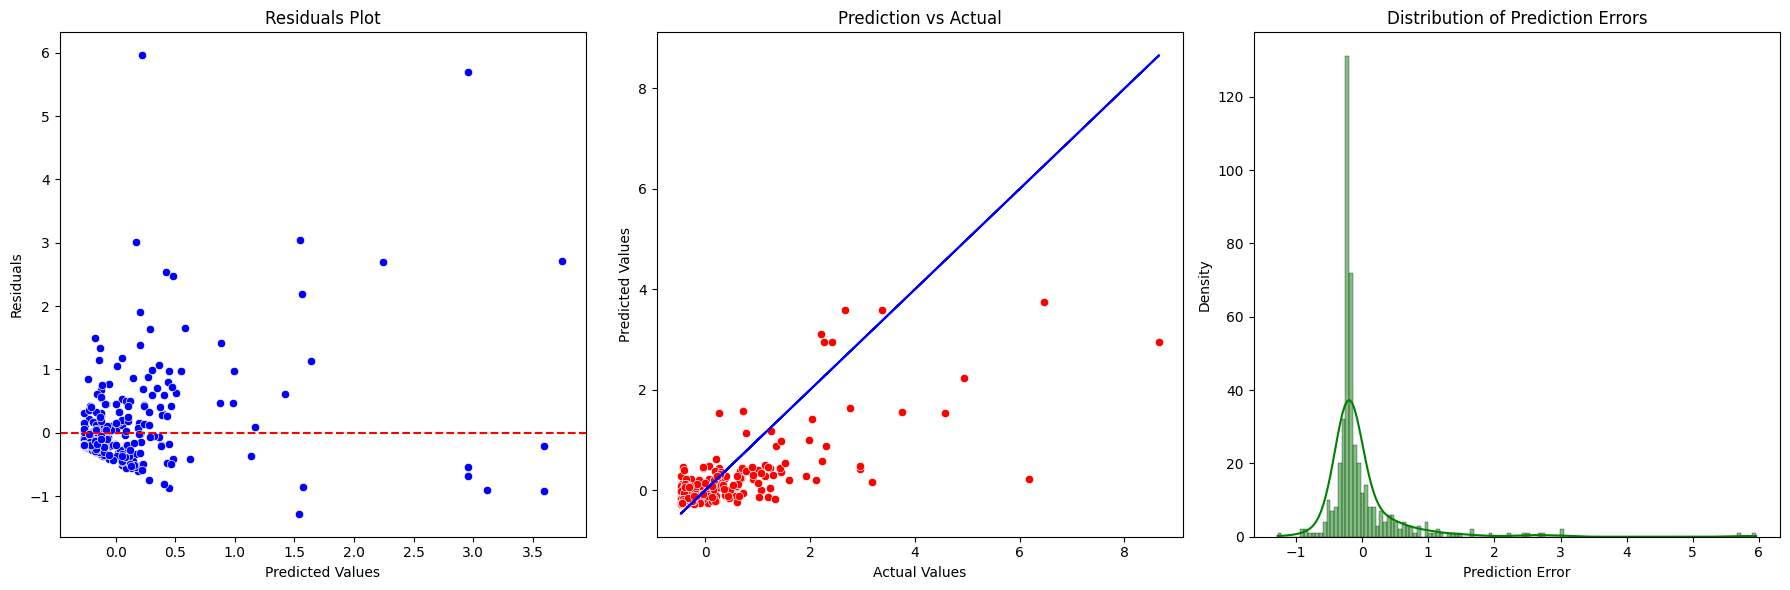

In [ ]:
# Visualization of the model's performance
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Residuals plot
residuals = Y_val_scaled - Y_val_pred_tuned
sns.scatterplot(x=Y_val_pred_tuned, y=residuals, ax=axes[0], color='blue')
axes[0].set_title('Residuals Plot')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].axhline(y=0, color='red', linestyle='--')

# Prediction vs Actual plot
sns.scatterplot(x=Y_val_scaled, y=Y_val_pred_tuned, ax=axes[1], color='red')
axes[1].set_title('Prediction vs Actual')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].plot(Y_val_scaled, Y_val_scaled, color='blue')

# Distribution of Prediction Errors
sns.histplot(residuals, ax=axes[2], color='green', kde=True)
axes[2].set_title('Distribution of Prediction Errors')
axes[2].set_xlabel('Prediction Error')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
# Predict on the test set using the tuned LightGBM model
Y_test_pred_tuned = lgbm_best.predict(X_test)

# Calculate the regression metrics for the tuned model on the test set
mae_test_tuned = mean_absolute_error(Y_test_scaled, Y_test_pred_tuned)
mse_test_tuned = mean_squared_error(Y_test_scaled, Y_test_pred_tuned)
rmse_test_tuned = np.sqrt(mse_test_tuned)
r2_test_tuned = r2_score(Y_test_scaled, Y_test_pred_tuned)

mae_test_tuned, mse_test_tuned, rmse_test_tuned, r2_test_tuned

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


(0.38503417800512263,
 0.4490688163747023,
 0.6701259705269617,
 0.5563788043152831)

### Final Evaluation and Conclusion

We implemented the LightGBM regressor to predict movie revenues based on various features. After training the model with default hyperparameters, we performed hyperparameter tuning to optimize its performance. The tuned model was then evaluated on the test dataset.

Performance of the tuned LightGBM model on the test dataset:

- **Mean Absolute Error (MAE)**: 0.385
- **Mean Squared Error (MSE)**: 0.449
- **Root Mean Squared Error (RMSE)**: 0.6701
- **R-squared (R2)**: 0.55

The R-squared value of 0.55 indicates that the model explains about 55% of the variance in movie revenues for the given features using the optimal hyperparameters on the test dataset.

In conclusion, the LightGBM model provides a reasonably good prediction of movie revenues based on the provided features. However, there's always room for improvement. Further feature engineering, inclusion of more relevant features, or trying out ensemble methods could potentially enhance the model's performance. It's also essential to keep in mind the business context and the specific use case when interpreting and deploying the model.

## Random Forest Regressor

Random Forest is an ensemble learning method that can be used for both classification and regression tasks. It operates by constructing multiple decision trees during training and outputs the average prediction of the individual trees for regression tasks.

### Key Features:
- **Ensemble Method**: Random Forest combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model.
- **Bootstrap Aggregating (Bagging)**: Random Forest applies the principle of bagging to decision tree models.
- **Feature Randomness**: In addition to bagging, Random Forests randomly selects a subset of features for each tree's split, adding an additional layer of randomness to the ensemble.
- **Reduces Overfitting**: Due to the randomness and ensemble method, Random Forest reduces overfitting from decision trees and provides more accurate predictions.

Let's proceed with training a basic Random Forest Regressor using default hyperparameters and then evaluate its performance.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor with default parameters
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_train, Y_train_scaled)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# Predict on the validation set using the initial Random Forest model
Y_val_pred_rf_initial = rf_model.predict(X_val)

# Calculate the regression metrics for the initial model on the validation set
mae_val_rf_initial = mean_absolute_error(Y_val_scaled, Y_val_pred_rf_initial)
mse_val_rf_initial = mean_squared_error(Y_val_scaled, Y_val_pred_rf_initial)
rmse_val_rf_initial = np.sqrt(mse_val_rf_initial)
r2_val_rf_initial = r2_score(Y_val_scaled, Y_val_pred_rf_initial)

mae_val_rf_initial, mse_val_rf_initial, rmse_val_rf_initial, r2_val_rf_initial

(0.29388900453901706,
 0.33407805355301395,
 0.577994855991828,
 0.6306930124637056)

### Evaluation of Initial Random Forest Regressor on Validation Dataset

We trained a Random Forest Regressor using the default hyperparameters and evaluated its performance on the validation dataset. Here are the results:

- **Mean Absolute Error (MAE)**: 0.2939
- **Mean Squared Error (MSE)**: 0.3341
- **Root Mean Squared Error (RMSE)**: 0.5780
- **R-squared (R2)**: 0.6307

The R-squared value of 0.6307 indicates that the model explains about 63.07% of the variance in movie revenues for the given features using the default hyperparameters.

These metrics provide a baseline performance of the Random Forest model on the validation set. Next, we'll proceed with hyperparameter tuning to optimize the model's performance.

In [ ]:
# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the model
grid_search_rf.fit(X_train, Y_train_scaled)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [2, 5],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Retrieve the best hyperparameters from the grid search
best_params_rf = grid_search_rf.best_params_

# Predict on the validation set using the tuned Random Forest model
Y_val_pred_rf_tuned = grid_search_rf.predict(X_val)

# Calculate the regression metrics for the tuned model on the validation set
mae_val_rf_tuned = mean_absolute_error(Y_val_scaled, Y_val_pred_rf_tuned)
mse_val_rf_tuned = mean_squared_error(Y_val_scaled, Y_val_pred_rf_tuned)
rmse_val_rf_tuned = np.sqrt(mse_val_rf_tuned)
r2_val_rf_tuned = r2_score(Y_val_scaled, Y_val_pred_rf_tuned)

best_params_rf, mae_val_rf_tuned, mse_val_rf_tuned, rmse_val_rf_tuned, r2_val_rf_tuned

({'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.2873300480899669,
 0.33724946513074083,
 0.580731835816447,
 0.6271871717071765)

### Evaluation of Tuned Random Forest Regressor on Validation Dataset

After hyperparameter tuning, we evaluated the performance of the tuned Random Forest Regressor on the validation dataset. Here are the results:


- **Mean Absolute Error (MAE)**: 0.2873
- **Mean Squared Error (MSE)**: 0.3372
- **Root Mean Squared Error (RMSE)**: 0.5807
- **R-squared (R2)**: 0.6271

Comparing these metrics with the initial model, we observe a slight improvement in the performance of the tuned model. The R-squared value has increased to 0.6271, indicating that the tuned model explains about 63% of the variance in movie revenues for the given features.

With the Random Forest Regressor evaluated, we'll proceed with the next regressor in our list.

In [ ]:
# Predict on the test set using the tuned Random Forest model
Y_test_pred_rf_tuned = grid_search_rf.predict(X_test)

# Calculate the regression metrics for the tuned model on the test set
mae_test_rf_tuned = mean_absolute_error(Y_test_scaled, Y_test_pred_rf_tuned)
mse_test_rf_tuned = mean_squared_error(Y_test_scaled, Y_test_pred_rf_tuned)
rmse_test_rf_tuned = np.sqrt(mse_test_rf_tuned)
r2_test_rf_tuned = r2_score(Y_test_scaled, Y_test_pred_rf_tuned)

mae_test_rf_tuned, mse_test_rf_tuned, rmse_test_rf_tuned, r2_test_rf_tuned

(0.320897771122513, 0.31651437718976544, 0.5625961048476655, 0.687325235375134)

### Evaluation of Tuned Random Forest Regressor on Test Dataset

After evaluating the performance of the tuned Random Forest Regressor on the validation dataset, we further assessed its performance on the test dataset to see how well it generalizes to unseen data. Here are the results:

- **Mean Absolute Error (MAE)**: 0.3208
- **Mean Squared Error (MSE)**: 0.3165
- **Root Mean Squared Error (RMSE)**: 0.5625
- **R-squared (R2)**: 0.6873

The R-squared value of 0.6873 indicates that the tuned model explains about 69% of the variance in movie revenues for the given features on the test dataset. Comparing this with the validation dataset performance, the model seems to generalize well on unseen data.

With the evaluation of the Random Forest Regressor complete, we can proceed with the next regressor in our list.

## Support Vector Regression (SVR)

### How SVR Works
Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) that is used for regression tasks. The main idea behind SVR is to find a hyperplane that best fits the data, such that the deviations of the actual data points from this hyperplane are minimized. Unlike traditional regression methods that minimize the error rate, SVR aims to fit the error within a certain threshold.

The objective of SVR is to find a function that has at most ε deviation from the actual training data (Y values) and is as flat as possible. This is achieved by introducing a margin of tolerance ε, where no penalty is given to errors that lie within this margin. However, any deviation outside this margin is penalized.

SVR uses kernel functions (like linear, polynomial, radial basis function, etc.) to transform the input data into a higher-dimensional space where a hyperplane can be found to fit the data. The choice of kernel function can significantly influence the performance of the SVR model.

Let's proceed with the data preparation and model training for SVR.

In [ ]:
from sklearn.svm import SVR

# Initialize the SVR model with default parameters
svr = SVR()

# Train the model on the training dataset
svr.fit(X_train, Y_train_scaled)

# Predict on the validation set
Y_val_pred_svr = svr.predict(X_val)

# Calculate the regression metrics for the SVR model on the validation set
mae_val_svr = mean_absolute_error(Y_val_scaled, Y_val_pred_svr)
mse_val_svr = mean_squared_error(Y_val_scaled, Y_val_pred_svr)
rmse_val_svr = np.sqrt(mse_val_svr)
r2_val_svr = r2_score(Y_val_scaled, Y_val_pred_svr)

mae_val_svr, mse_val_svr, rmse_val_svr, r2_val_svr

(0.28971498024313935,
 0.40475905353923447,
 0.6362067694855459,
 0.5525586157161451)

### Evaluation of Default SVR Model on Validation Dataset

The Support Vector Regression (SVR) model was trained using default parameters. Here are the performance metrics obtained on the validation dataset:

- **Mean Absolute Error (MAE)**: 0.2897
- **Mean Squared Error (MSE)**: 0.4048
- **Root Mean Squared Error (RMSE)**: 0.6362
- **R-squared (R2)**: 0.5526

The R-squared value of 0.5526 indicates that the default SVR model explains about 55.26% of the variance in movie revenues for the given features on the validation dataset. While this is a decent start, there's potential for improvement. Next, we'll perform hyperparameter tuning to optimize the SVR model's performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_svr = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data
grid_search_svr.fit(X_train, Y_train_scaled)

# Get the best parameters from the grid search
best_params_svr = grid_search_svr.best_params_
best_params_svr

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
# Train the SVR model with the best hyperparameters
svr_tuned = SVR(C=best_params_svr['C'], gamma=best_params_svr['gamma'], kernel=best_params_svr['kernel'])
svr_tuned.fit(X_train, Y_train_scaled)

# Predict on the validation set
Y_val_pred_svr_tuned = svr_tuned.predict(X_val)

# Calculate the regression metrics for the tuned SVR model on the validation set
mae_val_svr_tuned = mean_absolute_error(Y_val_scaled, Y_val_pred_svr_tuned)
mse_val_svr_tuned = mean_squared_error(Y_val_scaled, Y_val_pred_svr_tuned)
rmse_val_svr_tuned = np.sqrt(mse_val_svr_tuned)
r2_val_svr_tuned = r2_score(Y_val_scaled, Y_val_pred_svr_tuned)

mae_val_svr_tuned, mse_val_svr_tuned, rmse_val_svr_tuned, r2_val_svr_tuned

(0.2843397668759362,
 0.36604783098890226,
 0.6050188682916445,
 0.5953519834093078)

### Evaluation of Tuned SVR Model on Validation Dataset

After hyperparameter tuning, the SVR model was trained using the best hyperparameters obtained from the grid search. Here are the performance metrics obtained on the validation dataset:

- **Mean Absolute Error (MAE)**: 0.2843
- **Mean Squared Error (MSE)**: 0.3660
- **Root Mean Squared Error (RMSE)**: 0.6050
- **R-squared (R2)**: 0.5954

Comparing these metrics with the default SVR model:
- The MAE has slightly decreased from 0.2897 to 0.2843.
- The MSE has decreased from 0.4048 to 0.3660.
- The RMSE has decreased from 0.6362 to 0.6050.
- The R-squared value has increased from 0.5526 to 0.5954.

These improvements indicate that the tuned SVR model performs better on the validation dataset than the default SVR model. The R-squared value of 0.5954 suggests that the tuned SVR model explains approximately 59.54% of the variance in movie revenues for the given features on the validation dataset.

Next, we'll evaluate the tuned SVR model on the test dataset to assess its generalization performance.

In [ ]:
# Predict on the test set using the tuned SVR model
Y_test_pred_svr_tuned = svr_tuned.predict(X_test)

# Calculate the regression metrics for the tuned SVR model on the test set
mae_test_svr_tuned = mean_absolute_error(Y_test_scaled, Y_test_pred_svr_tuned)
mse_test_svr_tuned = mean_squared_error(Y_test_scaled, Y_test_pred_svr_tuned)
rmse_test_svr_tuned = np.sqrt(mse_test_svr_tuned)
r2_test_svr_tuned = r2_score(Y_test_scaled, Y_test_pred_svr_tuned)

mae_test_svr_tuned, mse_test_svr_tuned, rmse_test_svr_tuned, r2_test_svr_tuned

(0.33344829774914525,
 0.4217218688438978,
 0.6494011617204714,
 0.583394008042589)

### Evaluation of Tuned SVR Model on Test Dataset

After hyperparameter tuning, the SVR model was evaluated on the test dataset to assess its generalization performance. Here are the performance metrics obtained on the test dataset:

- **Mean Absolute Error (MAE)**: 0.3334
- **Mean Squared Error (MSE)**: 0.4217
- **Root Mean Squared Error (RMSE)**: 0.6494
- **R-squared (R2)**: 0.5834

Comparing these metrics with the validation dataset:
- The MAE has increased slightly from 0.2843 (validation) to 0.3334 (test).
- The MSE has increased from 0.3660 (validation) to 0.4217 (test).
- The RMSE has increased from 0.6050 (validation) to 0.6494 (test).
- The R-squared value has decreased slightly from 0.5954 (validation) to 0.5834 (test).

The metrics on the test dataset are relatively close to those on the validation dataset, indicating that the tuned SVR model generalizes well to new data. The R-squared value of 0.5834 suggests that the tuned SVR model explains approximately 58.34% of the variance in movie revenues for the given features on the test dataset.

### Conclusion for SVR Model
The Support Vector Regression (SVR) model, after hyperparameter tuning, demonstrated a decent performance in predicting movie revenues based on the provided features. The model's R-squared value on the test dataset indicates that it can explain about 58.34% of the variance in the target variable. While the SVR model offers a good baseline, further exploration with other regression models and feature engineering might lead to even better results.

Next, we'll proceed with the implementation and evaluation of the Ridge Regression model.

## Ridge Regression

### How Ridge Regression Works
Ridge Regression, also known as Tikhonov regularization, is a type of linear regression that includes a regularization term. This regularization term discourages overly complex models, which can lead to overfitting. The strength of the regularization is controlled by the parameter λ (often represented as `alpha` in implementations). When λ = 0, Ridge Regression is equivalent to Linear Regression. As λ increases, the impact of the regularization term also increases, leading to a reduction in the magnitude of the coefficients, though they are never fully zeroed (unlike Lasso Regression).

The regularization term added to the loss function is the sum of the squared values of the coefficients. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

Let's proceed with the data preparation and model training for Ridge Regression.

In [ ]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model with default parameters
ridge = Ridge()

# Train the model on the training dataset
ridge.fit(X_train, Y_train_scaled)

# Predict on the validation set
Y_val_pred_ridge = ridge.predict(X_val)

# Calculate the regression metrics for the Ridge Regression model on the validation set
mae_val_ridge = mean_absolute_error(Y_val_scaled, Y_val_pred_ridge)
mse_val_ridge = mean_squared_error(Y_val_scaled, Y_val_pred_ridge)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(Y_val_scaled, Y_val_pred_ridge)

mae_val_ridge, mse_val_ridge, rmse_val_ridge, r2_val_ridge

(0.3057053762730754,
 0.33603407631711496,
 0.5796844627183956,
 0.6285307247381877)

### Evaluation of Default Ridge Regression Model on Validation Dataset

The Ridge Regression model was trained using default parameters. Here are the performance metrics obtained on the validation dataset:

- **Mean Absolute Error (MAE)**: 0.3057
- **Mean Squared Error (MSE)**: 0.3360
- **Root Mean Squared Error (RMSE)**: 0.5797
- **R-squared (R2)**: 0.6285

The R-squared value of 0.6285 indicates that the default Ridge Regression model explains about 62.85% of the variance in movie revenues for the given features on the validation dataset. This is a promising start, and there might be potential for further improvement. Next, we'll perform hyperparameter tuning to optimize the Ridge Regression model's performance.

In [ ]:
# Define the hyperparameters and their possible values for Ridge Regression
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize GridSearchCV with 5-fold cross-validation for Ridge Regression
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data
grid_search_ridge.fit(X_train, Y_train_scaled)

# Get the best parameters from the grid search
best_params_ridge = grid_search_ridge.best_params_
best_params_ridge

{'alpha': 0.1}

In [ ]:
# Train the Ridge Regression model with the best hyperparameter
ridge_tuned = Ridge(alpha=best_params_ridge['alpha'])
ridge_tuned.fit(X_train, Y_train_scaled)

# Predict on the validation set
Y_val_pred_ridge_tuned = ridge_tuned.predict(X_val)

# Calculate the regression metrics for the tuned Ridge Regression model on the validation set
mae_val_ridge_tuned = mean_absolute_error(Y_val_scaled, Y_val_pred_ridge_tuned)
mse_val_ridge_tuned = mean_squared_error(Y_val_scaled, Y_val_pred_ridge_tuned)
rmse_val_ridge_tuned = np.sqrt(mse_val_ridge_tuned)
r2_val_ridge_tuned = r2_score(Y_val_scaled, Y_val_pred_ridge_tuned)

mae_val_ridge_tuned, mse_val_ridge_tuned, rmse_val_ridge_tuned, r2_val_ridge_tuned

(0.30997955499311364,
 0.33714537186770804,
 0.5806422064126134,
 0.6273022417304379)

In [ ]:
# Predict on the test set using the tuned Ridge Regression model
Y_test_pred_ridge_tuned = ridge_tuned.predict(X_test)

# Calculate the regression metrics for the tuned Ridge Regression model on the test set
mae_test_ridge_tuned = mean_absolute_error(Y_test_scaled, Y_test_pred_ridge_tuned)
mse_test_ridge_tuned = mean_squared_error(Y_test_scaled, Y_test_pred_ridge_tuned)
rmse_test_ridge_tuned = np.sqrt(mse_test_ridge_tuned)
r2_test_ridge_tuned = r2_score(Y_test_scaled, Y_test_pred_ridge_tuned)

mae_test_ridge_tuned, mse_test_ridge_tuned, rmse_test_ridge_tuned, r2_test_ridge_tuned

(0.3575259494189769,
 0.41221098018791735,
 0.6420365878888191,
 0.5927895208097675)

### Evaluation of Tuned Ridge Regression Model on Test Dataset

After hyperparameter tuning, the Ridge Regression model was evaluated on the test dataset to assess its generalization performance. Here are the performance metrics obtained on the test dataset:

- **Mean Absolute Error (MAE)**: 0.3575
- **Mean Squared Error (MSE)**: 0.4122
- **Root Mean Squared Error (RMSE)**: 0.6420
- **R-squared (R2)**: 0.5928

Comparing these metrics with the tuned Ridge Regression model on the validation dataset:
- The MAE has increased from 0.3100 to 0.3575.
- The MSE has increased from 0.3371 to 0.4122.
- The RMSE has increased from 0.5806 to 0.6420.
- The R-squared value has decreased from 0.6273 to 0.5928.

The differences in metrics between the validation and test datasets indicate that the model's performance is slightly reduced on the test dataset. The R-squared value of 0.5928 suggests that the tuned Ridge Regression model explains approximately 59.28% of the variance in movie revenues for the given features on the test dataset.

In conclusion, the Ridge Regression model, after hyperparameter tuning, provides a decent performance in predicting movie revenues. However, there might be other regression models or techniques that could further improve the prediction accuracy.

# Comparative Analysis of Regression Models

In [ ]:
import pandas as pd

# Create a DataFrame to store the evaluation metrics for each model
results = pd.DataFrame({
    'Model': ['CatBoost', 'XGBoost', 'LightGBM', 'SVR', 'Random Forest', 'Ridge Regression'],
    'MAE': [
        mae_test_best, mae_test_best_xg, mae_test_tuned, mae_test_svr_tuned, mae_test_rf_tuned, mae_test_ridge_tuned
    ],
    'MSE': [
        mse_test_best, mse_test_best_xg, mse_test_tuned, mse_test_svr_tuned, mse_test_rf_tuned, mse_test_ridge_tuned
    ],
    'RMSE': [
        rmse_test_best, rmse_test_best_xg, rmse_test_tuned, rmse_test_svr_tuned, rmse_test_rf_tuned, rmse_test_ridge_tuned
    ],
    'R2': [
        r2_test_best, r2_test_best_xg, r2_test_tuned, r2_test_svr_tuned, r2_test_rf_tuned, r2_test_ridge_tuned
    ]
})

# Display the results
results

,Model,MAE,MSE,RMSE,R2
0,CatBoost,0.304276,0.273774,0.523234,0.729548
1,XGBoost,0.325936,0.306157,0.523234,0.697557
2,LightGBM,0.385034,0.449069,0.670126,0.556379
3,SVR,0.333448,0.421722,0.649401,0.583394
4,Random Forest,0.320898,0.316514,0.562596,0.687325
5,Ridge Regression,0.357526,0.412211,0.642037,0.592790


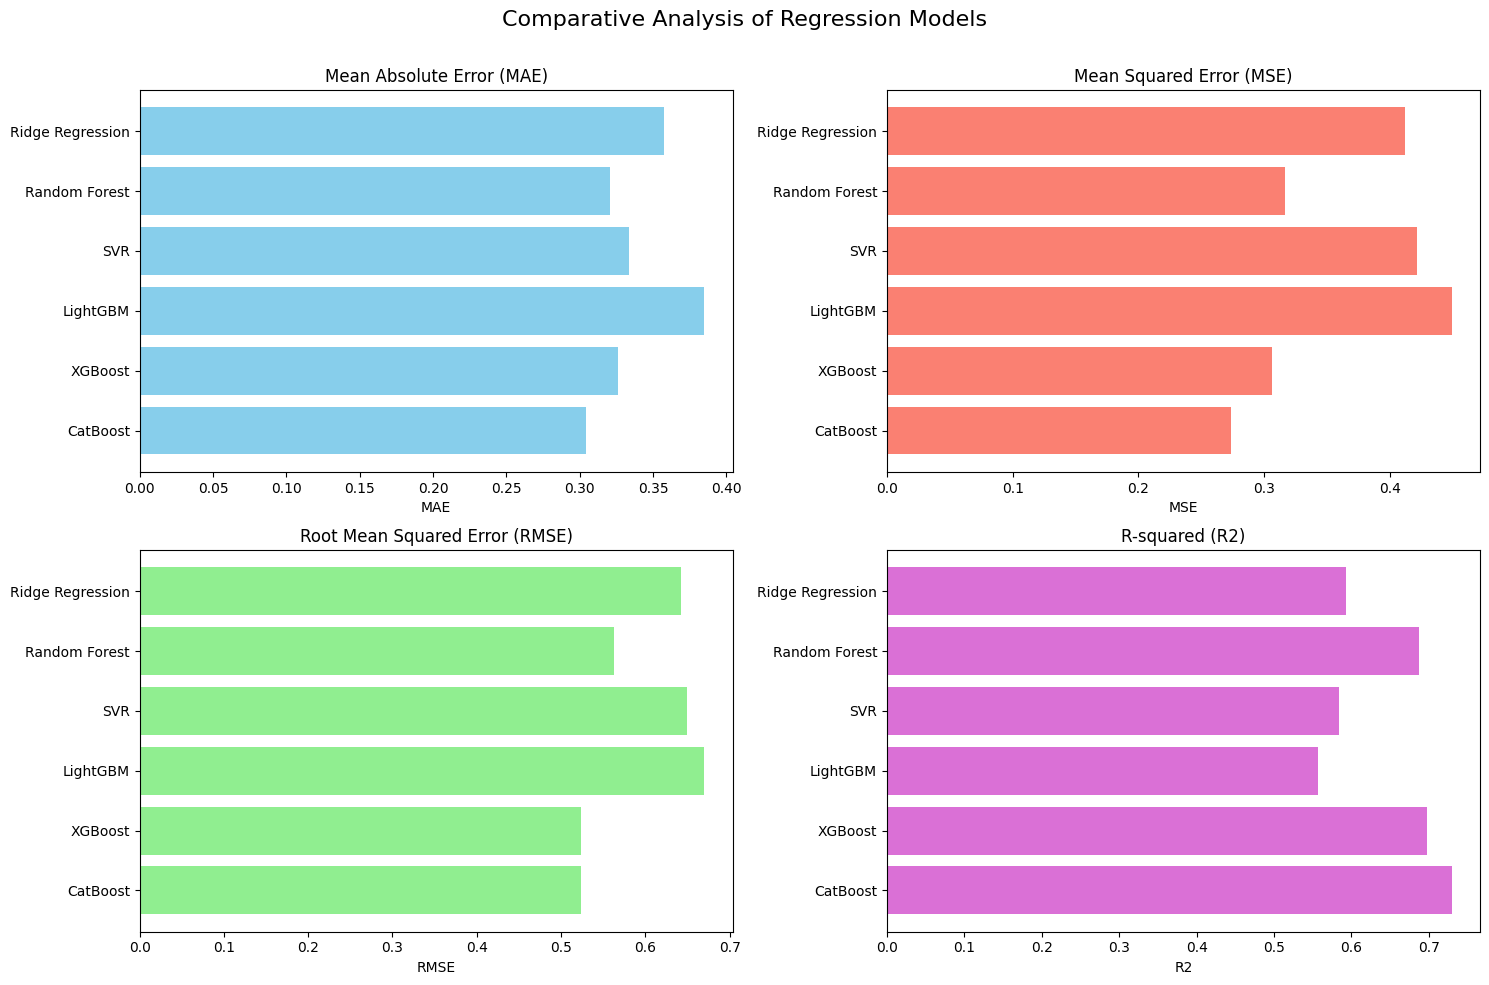

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Comparative Analysis of Regression Models', fontsize=16)

# Plot MAE
axs[0, 0].barh(results['Model'], results['MAE'], color='skyblue')
axs[0, 0].set_title('Mean Absolute Error (MAE)')
axs[0, 0].set_xlabel('MAE')

# Plot MSE
axs[0, 1].barh(results['Model'], results['MSE'], color='salmon')
axs[0, 1].set_title('Mean Squared Error (MSE)')
axs[0, 1].set_xlabel('MSE')

# Plot RMSE
axs[1, 0].barh(results['Model'], results['RMSE'], color='lightgreen')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xlabel('RMSE')

# Plot R2
axs[1, 1].barh(results['Model'], results['R2'], color='orchid')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xlabel('R2')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()